# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.head(100)

id                  region  price    year manufacturer  \
0   7222695916                prescott   6000     NaN          NaN   
1   7218891961            fayetteville  11900     NaN          NaN   
2   7221797935            florida keys  21000     NaN          NaN   
3   7222270760  worcester / central MA   1500     NaN          NaN   
4   7210384030              greensboro   4900     NaN          NaN   
..         ...                     ...    ...     ...          ...   
95  7309798041                  auburn   2100  2006.0       subaru   
96  7309361405                  auburn     80  2004.0        honda   
97  7309271279                  auburn  15990  2016.0          NaN   
98  7309271051                  auburn  20590  2013.0        acura   
99  7309229548                  auburn  29590  2018.0         audi   

                       model  condition    cylinders fuel  odometer  \
0                        NaN        NaN          NaN  NaN       NaN   
1                        NaN        NaN          NaN  NaN       NaN   
2                        NaN        NaN          NaN  NaN       NaN   
3                        NaN        NaN          NaN  NaN       NaN   
4                        NaN        NaN          NaN  NaN       NaN   
..                       ...        ...          ...  ...       ...   
95                   impreza       fair  4 cylinders  gas   97000.0   
96                       NaN  excellent  6 cylinders  gas   94020.0   
97     Scion iM Hatchback 4D       good          NaN  gas   29652.0   
98      mdx sport utility 4d       good  6 cylinders  gas   77087.0   
99  a6 2.0t premium sedan 4d       good          NaN  gas   13035.0   

   title_status transmission                VIN drive size       type  \
0           NaN          NaN                NaN   NaN  NaN        NaN   
1           NaN          NaN                NaN   NaN  NaN        NaN   
2           NaN          NaN                NaN   NaN  NaN        NaN   
3           NaN          NaN                NaN   NaN  NaN        NaN   
4           NaN          NaN                NaN   NaN  NaN        NaN   
..          ...          ...                ...   ...  ...        ...   
95        clean    automatic                NaN   NaN  NaN  hatchback   
96        clean    automatic                NaN   NaN  NaN        NaN   
97        clean        other  JTNKARJEXGJ517925   fwd  NaN  hatchback   
98        clean        other  2HNYD2H30DH510846   NaN  NaN      other   
99        clean        other  WAUC8AFC6JN041814   fwd  NaN      sedan   

   paint_color state  
0          NaN    az  
1          NaN    ar  
2          NaN    fl  
3          NaN    ma  
4          NaN    nc  
..         ...   ...  
95         NaN    al  
96         NaN    al  
97        blue    al  
98      silver    al  
99         NaN    al  

[100 rows x 18 columns]

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
df.drop(columns=['id', 'VIN', 'region'], inplace=True)
df.head(10)

price  year manufacturer model condition cylinders fuel  odometer  \
0   6000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
1  11900   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
2  21000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
3   1500   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
4   4900   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
5   1600   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
6   1000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
7  15995   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
8   5000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
9   3000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   

  title_status transmission drive size type paint_color state  
0          NaN          NaN   NaN  NaN  NaN         NaN    az  
1          NaN          NaN   NaN  NaN  NaN         NaN    ar  
2          NaN          NaN   NaN  NaN  NaN         NaN    fl  
3          NaN          NaN   NaN  NaN  NaN         NaN    ma  
4          NaN          NaN   NaN  NaN  NaN         NaN    nc  
5          NaN          NaN   NaN  NaN  NaN         NaN    ny  
6          NaN          NaN   NaN  NaN  NaN         NaN    ny  
7          NaN          NaN   NaN  NaN  NaN         NaN    ny  
8          NaN          NaN   NaN  NaN  NaN         NaN    or  
9          NaN          NaN   NaN  NaN  NaN         NaN    pa

In [4]:
df.dropna(inplace=True)
df.head(10)

price    year manufacturer                 model  condition    cylinders  \
31   15000  2013.0         ford             f-150 xlt  excellent  6 cylinders   
55   19900  2004.0         ford       f250 super duty       good  8 cylinders   
59   14000  2012.0        honda               odyssey  excellent  6 cylinders   
65   22500  2001.0         ford                  f450       good  8 cylinders   
73   15000  2017.0        dodge  charger rt 4dr sedan  excellent  8 cylinders   
86    3000  2004.0     chrysler        town & country       good  6 cylinders   
110   9500  2003.0     chrysler        town & country  excellent  6 cylinders   
119  17500  2008.0       toyota            fj cruiser       good  6 cylinders   
126      0  2018.0    chevrolet     express cargo van   like new  6 cylinders   
127      0  2019.0    chevrolet     express cargo van   like new  6 cylinders   

       fuel  odometer title_status transmission drive       size      type  \
31      gas  128000.0        clean    automatic   rwd  full-size     truck   
55   diesel   88000.0        clean    automatic   4wd  full-size    pickup   
59      gas   95000.0        clean    automatic   fwd  full-size  mini-van   
65   diesel  144700.0        clean       manual   rwd  full-size     truck   
73      gas   90000.0      rebuilt    automatic   rwd   mid-size     sedan   
86      gas  176144.0        clean    automatic   fwd   mid-size  mini-van   
110     gas   30376.0        clean    automatic   fwd   mid-size  mini-van   
119     gas  201300.0        clean       manual   4wd  full-size   offroad   
126     gas   68472.0        clean    automatic   rwd  full-size       van   
127     gas   69125.0        clean    automatic   rwd  full-size       van   

    paint_color state  
31        black    al  
55         blue    al  
59       silver    al  
65        white    al  
73         grey    al  
86       silver    al  
110        blue    al  
119       black    al  
126       white    al  
127       white    al

In [5]:
df['fuel'].value_counts()

fuel
gas         72574
diesel       5425
hybrid        967
electric      131
other          98
Name: count, dtype: int64

In [6]:
df['condition'].value_counts()

condition
excellent    39482
good         25320
like new     10603
fair          3006
new            539
salvage        245
Name: count, dtype: int64

In [7]:
df['size'].value_counts()

size
full-size      44033
mid-size       23729
compact        10061
sub-compact     1372
Name: count, dtype: int64

In [8]:
ohe_cols = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
ordinal_list = [
    ['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
    ['sub-compact', 'compact', 'mid-size', 'full-size'],
]
ordinal_cols = ['condition', 'size']

In [9]:
df['model'].value_counts()

model
f-150                        1637
silverado 1500               1434
1500                          882
camry                         683
accord                        659
                             ... 
997                             1
e350 extended club wagon        1
s60 t6 r design                 1
q7 quattro prestige sline       1
gand wagoneer                   1
Name: count, Length: 9529, dtype: int64

The 'model' field has 9529 different values. Looking at the values, there's no real consistency or pattern to the model names. Some have series and features, others are just the model name. I believe a clean model field would be great for analysis, but the field has no consistency so I don't think we can use it.

In [10]:
df = df.drop(columns=['model'])

Cylinders does have a pattern to it, and with only 200 being in the 'other' category, we can just drop those compared to the side of the dataset giving cylinders a numeric value.

In [11]:
df['cylinders'] = df['cylinders'].apply(lambda x: float(str(x).replace(" cylinders", "")) if x != 'other' else None)

In [12]:
df.dropna(inplace=True)

In [13]:
df = df.query('price > 500')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73931 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         73931 non-null  int64  
 1   year          73931 non-null  float64
 2   manufacturer  73931 non-null  object 
 3   condition     73931 non-null  object 
 4   cylinders     73931 non-null  float64
 5   fuel          73931 non-null  object 
 6   odometer      73931 non-null  float64
 7   title_status  73931 non-null  object 
 8   transmission  73931 non-null  object 
 9   drive         73931 non-null  object 
 10  size          73931 non-null  object 
 11  type          73931 non-null  object 
 12  paint_color   73931 non-null  object 
 13  state         73931 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 8.5+ MB


In [15]:
df.describe()

price          year     cylinders      odometer
count  7.393100e+04  73931.000000  73931.000000  7.393100e+04
mean   8.502886e+04   2008.220151      5.962370  1.244522e+05
std    1.436124e+07      9.985866      1.648486  1.977680e+05
min    5.500000e+02   1900.000000      3.000000  0.000000e+00
25%    5.700000e+03   2005.000000      4.000000  7.587950e+04
50%    9.988000e+03   2010.000000      6.000000  1.160000e+05
75%    1.800000e+04   2014.000000      8.000000  1.572055e+05
max    3.736929e+09   2022.000000     12.000000  1.000000e+07

<Axes: xlabel='price', ylabel='Count'>

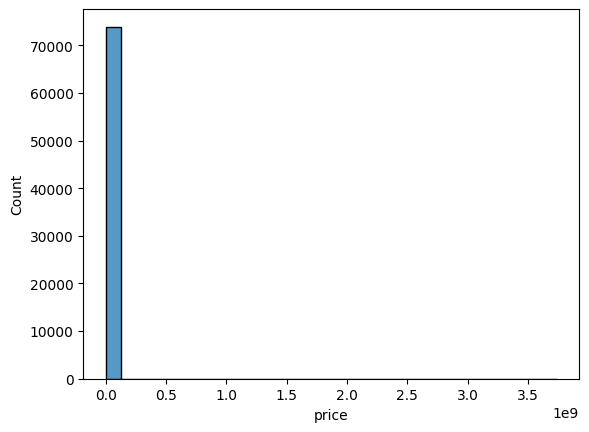

In [16]:
sns.histplot(df['price'], bins=30)

#### IQR
Use Inter Quartile Range to find a lower and upper bound for price and odometer and filter the dataset based on that.

In [17]:
price_fist_q = df['price'].quantile(0.25)
price_third_q = df['price'].quantile(0.75)

price_iqr = price_third_q - price_fist_q
price_iqr_lower = price_fist_q - 1.5 * price_iqr
price_iqr_upper = price_third_q + 1.5 * price_iqr

df_no_outliers = df[(df['price'] > price_iqr_lower) & (df['price'] < price_iqr_upper)]

odometer_fist_q = df['odometer'].quantile(0.25)
odometer_third_q = df['odometer'].quantile(0.75)

odometer_iqr = odometer_third_q - odometer_fist_q
odometer_iqr_lower = odometer_fist_q - 1.5 * odometer_iqr
odometer_iqr_upper = odometer_third_q + 1.5 * odometer_iqr

df_no_outliers = df_no_outliers[(df['odometer'] > odometer_iqr_lower) & (df['odometer'] < odometer_iqr_upper)]

In [18]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68470 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         68470 non-null  int64  
 1   year          68470 non-null  float64
 2   manufacturer  68470 non-null  object 
 3   condition     68470 non-null  object 
 4   cylinders     68470 non-null  float64
 5   fuel          68470 non-null  object 
 6   odometer      68470 non-null  float64
 7   title_status  68470 non-null  object 
 8   transmission  68470 non-null  object 
 9   drive         68470 non-null  object 
 10  size          68470 non-null  object 
 11  type          68470 non-null  object 
 12  paint_color   68470 non-null  object 
 13  state         68470 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 7.8+ MB


<Axes: xlabel='price', ylabel='Count'>

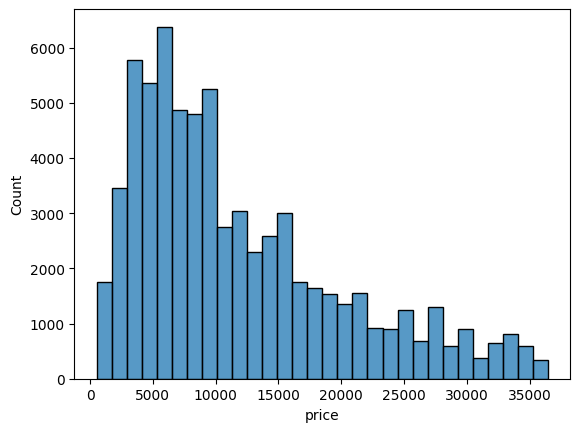

In [19]:
sns.histplot(df_no_outliers['price'], bins=30)

### Log transform on y value
- checking the log transform of the y value to see if the data is more normally distributed

<Axes: xlabel='price', ylabel='Count'>

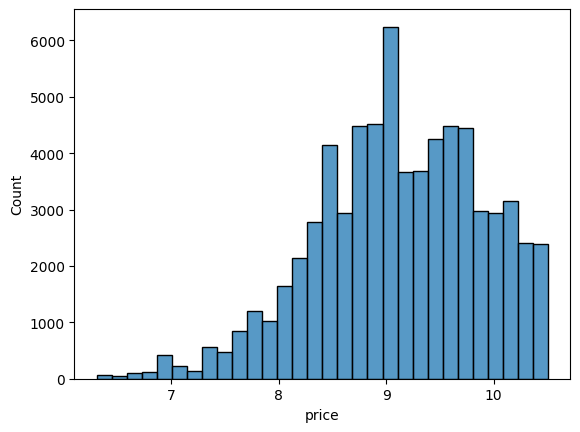

In [20]:
sns.histplot(np.log(df_no_outliers['price']), bins=30)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [21]:
x, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

In [22]:
col_transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), ohe_cols),
    (OrdinalEncoder(categories=ordinal_list), ordinal_cols),
    (StandardScaler(), make_column_selector(dtype_include='number')),
    remainder='passthrough'
)

In [23]:
col_transformer.fit_transform(x[ohe_cols + ordinal_cols])

<68470x134 sparse matrix of type '<class 'numpy.float64'>'
	with 683261 stored elements in Compressed Sparse Row format>

In [16]:
len(col_transformer.get_feature_names_out())

536

### Sequential Feature Selection w/ Ridge

In [24]:
pipe = Pipeline([
    ('col_transformer', col_transformer),
    ('selector', SequentialFeatureSelector(Ridge())),
    ('model', LinearRegression()),
])

grid = GridSearchCV(pipe, param_grid={
    'selector__n_features_to_select': range(2, 5),
}, cv=5)

In [25]:
grid.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['manufacturer',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new'],
                                                                                                    ['sub-compact',
                                                                                                     'compact',
                                                                                                     'mid-size',
                                                                                                     'full-size']]),
                                                                         ['condition',
                                                                          'size']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x14785de50>)])),
                                       ('selector',
                                        SequentialFeatureSelector(estimator=Ridge())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__n_features_to_select': range(2, 5)})

In [26]:
best_estimator_sfs = grid.best_estimator_
selector_sfs = best_estimator_sfs.named_steps['selector']
trans_sfs = best_estimator_sfs.named_steps['col_transformer']
trans_sfs.get_feature_names_out()[selector_sfs.get_support()]

array(['onehotencoder__drive_fwd', 'standardscaler__odometer'],
      dtype=object)

#### Permuatation Importance: Sequential Feature Selection
From the results below we can see favorable importances from the 2 features selected by SFS.

In [27]:
result = permutation_importance(grid, x, y, n_repeats=10, random_state=42)
df_perm = pd.DataFrame(result.importances.T, columns=x.columns)
df_perm.mean().sort_values(ascending=False)

odometer        0.419996
drive           0.274683
year            0.000000
manufacturer    0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
title_status    0.000000
transmission    0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

### LASSO Feature Selection

In [28]:
pipe_lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('selector', SelectFromModel(Lasso())),
    ('model', LinearRegression()),
])

grid_lasso = GridSearchCV(pipe_lasso, param_grid={
    'selector__max_features': range(2, 5),
}, cv=5)

In [29]:
grid_lasso.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['manufacturer',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new'],
                                                                                                    ['sub-compact',
                                                                                                     'compact',
                                                                                                     'mid-size',
                                                                                                     'full-size']]),
                                                                         ['condition',
                                                                          'size']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x14785de50>)])),
                                       ('selector',
                                        SelectFromModel(estimator=Lasso())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__max_features': range(2, 5)})

In [30]:
best_estimator_lasso = grid_lasso.best_estimator_
selector_lasso = best_estimator_lasso.named_steps['selector']
trans_lasso = best_estimator_lasso.named_steps['col_transformer']
trans_lasso.get_feature_names_out()[selector_lasso.get_support()]

array(['onehotencoder__fuel_diesel', 'standardscaler__odometer'],
      dtype=object)

#### Permutation Importance: LASSO
From the results below, there are favorable importances in the 2 features LASSO selected. We will include this in our results.

In [31]:
result_lasso = permutation_importance(grid_lasso, x, y, n_repeats=10, random_state=42)
df_perm_lasso = pd.DataFrame(result_lasso.importances.T, columns=x.columns)
df_perm_lasso.mean().sort_values(ascending=False)

odometer        0.444054
fuel            0.156742
year            0.000000
manufacturer    0.000000
condition       0.000000
cylinders       0.000000
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

### Revisited: Trained without fuel

In [32]:
ohe_cols_no_fuel = ['manufacturer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
ordinal_list = [
    ['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
    ['sub-compact', 'compact', 'mid-size', 'full-size'],
]
ordinal_cols = ['condition', 'size']

col_transformer2 = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), ohe_cols_no_fuel),
    (OrdinalEncoder(categories=ordinal_list), ordinal_cols),
    (StandardScaler(), make_column_selector(dtype_include='number')),
    remainder='passthrough'
)

pipe_lasso = Pipeline([
    ('col_transformer', col_transformer2),
    ('selector', SelectFromModel(Lasso())),
    ('model', LinearRegression()),
])

grid_lasso_no_fuel = GridSearchCV(pipe_lasso, param_grid={
    'selector__max_features': range(2, 5),
}, cv=5)

In [33]:
grid_lasso_no_fuel.fit(x.drop(columns=['fuel']), y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['manufacturer',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new'],
                                                                                                    ['sub-compact',
                                                                                                     'compact',
                                                                                                     'mid-size',
                                                                                                     'full-size']]),
                                                                         ['condition',
                                                                          'size']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x145917340>)])),
                                       ('selector',
                                        SelectFromModel(estimator=Lasso())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__max_features': range(2, 5)})

In [34]:
best_estimator_lasso_no_fuel = grid_lasso_no_fuel.best_estimator_
selector_lasso_no_fuel = best_estimator_lasso_no_fuel.named_steps['selector']
trans_lasso_no_fuel = best_estimator_lasso_no_fuel.named_steps['col_transformer']
trans_lasso_no_fuel.get_feature_names_out()[selector_lasso_no_fuel.get_support()]

array(['onehotencoder__manufacturer_porsche', 'standardscaler__odometer'],
      dtype=object)

In [35]:
result_lasso_no_fuel = permutation_importance(grid_lasso_no_fuel, x, y, n_repeats=10, random_state=42)
df_perm_lasso_no_fuel = pd.DataFrame(result_lasso_no_fuel.importances.T, columns=x.columns)
df_perm_lasso_no_fuel.mean().sort_values(ascending=False)

odometer        0.381713
manufacturer    0.001547
year            0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

### Ridge Feature Selection

In [36]:
pipe_ridge = Pipeline([
    ('col_transformer', col_transformer),
    ('selector', SelectFromModel(Ridge())), 
    ('model', LinearRegression()),
])

grid_ridge = GridSearchCV(pipe_ridge, param_grid={
    'selector__max_features': range(2, 5),
}, cv=5)

In [37]:
grid_ridge.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['manufacturer',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new'],
                                                                                                    ['sub-compact',
                                                                                                     'compact',
                                                                                                     'mid-size',
                                                                                                     'full-size']]),
                                                                         ['condition',
                                                                          'size']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x14785de50>)])),
                                       ('selector',
                                        SelectFromModel(estimator=Ridge())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__max_features': range(2, 5)})

In [38]:
best_estimator_ridge = grid_ridge.best_estimator_
selector_ridge = best_estimator_ridge.named_steps['selector']
trans_ridge = best_estimator_ridge.named_steps['col_transformer']
trans_ridge.get_feature_names_out()[selector_ridge.get_support()]

array(['onehotencoder__manufacturer_aston-martin',
       'onehotencoder__manufacturer_datsun'], dtype=object)

#### Permutation Importance: Ridge
From the permutation importance below, it's safe to say the Feature Selection from Ridge was not very successful. We can omit the results of this part of the analysis

In [39]:
result_ridge = permutation_importance(grid_ridge, x, y, n_repeats=10, random_state=42)
df_perm_ridge = pd.DataFrame(result_ridge.importances.T, columns=x.columns)
df_perm_ridge.mean().sort_values(ascending=False)

manufacturer    0.000232
year            0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Both of the models we're using both had odometer in it. With one selecting fuel type, and the other selecting drive. Let's look at both.

#### SFS `odometer` and `drive`

<Axes: xlabel='odometer', ylabel='price'>

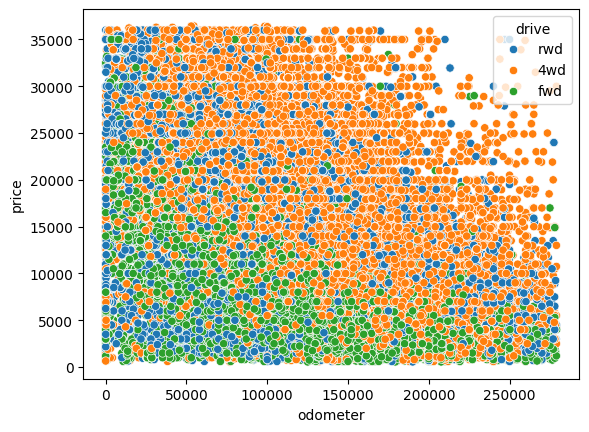

In [40]:
sns.scatterplot(x='odometer', y='price', data=df_no_outliers, hue='drive')

In [41]:
px.scatter_3d(df_no_outliers, x='odometer', y='price', z='year', color='drive')

<Axes: xlabel='price', ylabel='odometer'>

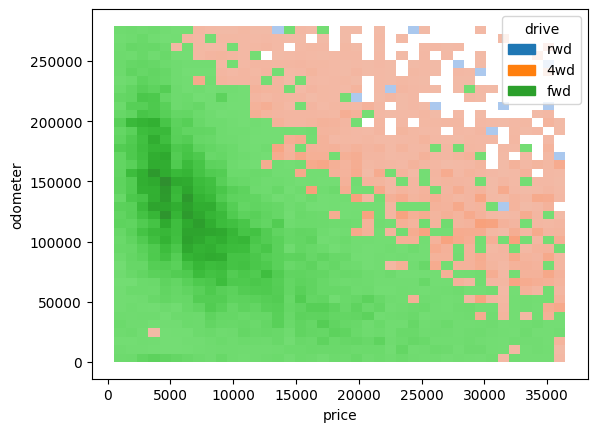

In [42]:
sns.histplot(df_no_outliers, x='price', y='odometer', hue='drive', bins=40)

#### LASSO `odometer` and `fuel`

<Axes: xlabel='odometer', ylabel='price'>

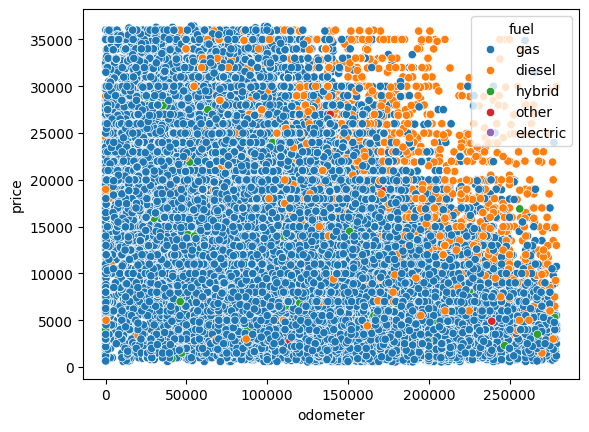

In [43]:
sns.scatterplot(x='odometer', y='price', data=df_no_outliers, hue='fuel')

In [44]:
px.scatter_3d(df_no_outliers, x='odometer', y='price', z='year', color='fuel')

<Axes: xlabel='price', ylabel='odometer'>

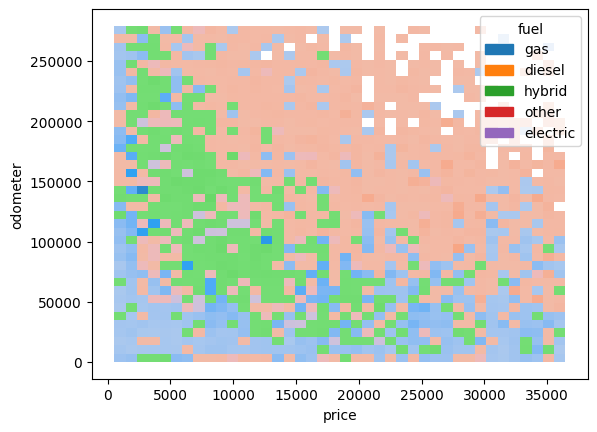

In [45]:
sns.histplot(df_no_outliers, x='price', y='odometer', hue='fuel', bins=40)

In [46]:
df['fuel'].value_counts()

fuel
gas         67819
diesel       5073
hybrid        911
other          95
electric       33
Name: count, dtype: int64

From the looks of the graphs above, and checking the value counts: `gas` vastly outnumbers the other fuel types in the dataset which would skew the data. I've provided a second analysis in section: *Revisited: Trained without fuel*. Which will show on the second attempt, it says manufacturer "porche" is the second selected factor with a confidence of .00015. We can drop this and say that `odometer` is the most important factor in a vehicles pricing.

Using the Sequential Feature Selection, I used `GridSearchCV` with `cv=5` for cross-validation and search parameters of `n_features_to_select` between 2 and 5. With fitting the `GridSearchCV`, it came up with an optimal 2 features of `odometer` and `drive` with drive being of type `fwd`.

<Axes: xlabel='year', ylabel='price'>

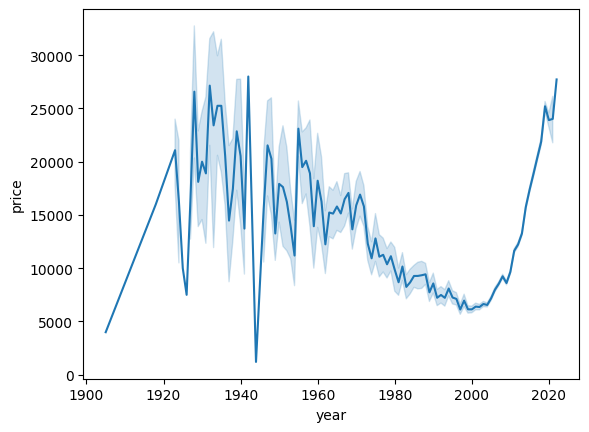

In [47]:
sns.lineplot(x='year', y='price', data=df_no_outliers)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Greetings `client`,

I've concluded the analysis you requested on *What drives the price of a car?*. Below is a summary of my findings. If you'd like to know the steps I took to get there they will be in the section called `Details`.

# Summary
The two features I found to be the most significant in the price of a car were as follows: `odometer` and `drive`. Please take a look at the graph below:

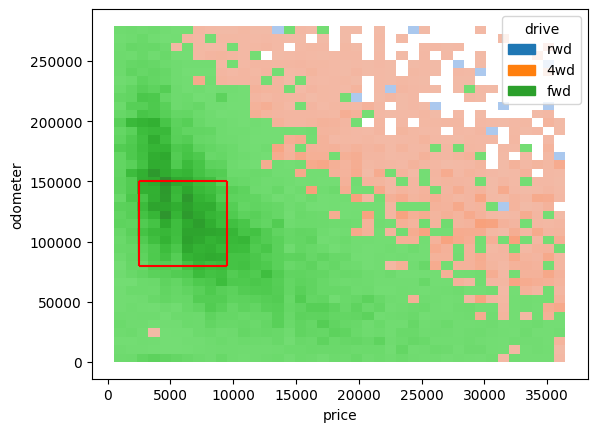

In [48]:
sns.histplot(df_no_outliers, x='price', y='odometer', hue='drive', bins=40)

plt.vlines(x=9500, ymin=80000, ymax=150000, color='red')
plt.vlines(x=2500, ymin=80000, ymax=150000, color='red')
plt.hlines(y=80000, xmin=2500, xmax=9500, color='red')
plt.hlines(y=150000, xmin=2500, xmax=9500, color='red')
plt.show()

From the graph above, let's take a look at the red box. We see it shows a darker green area which indicates a large concentration of vehicles in this area. Green in the legend shows these are `fwd` vehicles. My recommendation for inventory tuning is cars with a `price` between 2500 and 9500 with an `odometer` reading between 80000 and 150000 and have a `drive` of `fwd`.

# Details

#### Data Preparation:
`id`, `VIN`, and `region`, `model` were all fields I dropped from the dataset. The first two are unique identifiers which would not help in any model as there would be no relation between unique identifiers, and `region` and `model` were inconsistent and sloppy data. The number of unique values for `region`, `model` were too great to use in the final dataset. One Hot Encoding these fields would've increased the complexity of the entire model 1000X. 

Once those were dropped, I needed to clean Cylinders. Dropping the 'other' category (as this was less than 1% of the dataset), and converting the rest to their integer equivalents with string replacement. I then dropped all None/Null/NA values as there were too many null values in the dataset.

I noticed some very large and very small values in the `price` and `odometer` fields. To mitigate this I found the IQR of each field to create an lower and upper bound which I then filtered out of the dataset.

#### Modeling:
When searching for models to select important features I tested 3 models. Sequential Feature Selection with Ridge as the estimator, Ridge as a standalone feature selection, and LASSO as a standalone feature selection. 

Ridge performed the worst, guessing that `manufacturer` was the biggest indicator. Using `permutation_importance` which tests features independent of each other to see if the model stands up, `manufacturer` only scored a 0.000232. So we can toss this model out.

LASSO performed slightly better, estimating that `odometer` and `fuel` were the two biggest indicators. After checking the values of the `fuel` field, I noticed that `fuel:gas` was a large majority of the dataset which would skew results. I revisted this algorithm dropping the `fuel` field as well. It came back with `odometer` and `manufacturer:porche`. Using `permutation_importance` `odometer` scored very well while `manufacturer:porche` did not. We can drop `manufacturer:porche` and take `odometer` as one of the important features.

Sequential Feature Selection with Ridge performed the highest. It found that `odometer` and `drive` were the highest indicators of price. `permutation_importance` resulted in odometer: 0.444054, fuel: 0.156742. I used the results of this model to draw the plot shown above. Then drew a box around the darkest part which would indicate what is the most popular.